This notebook is designed to be run as the first notebook of four included in this submission.

# Hailey Weinschenk - BrainStation Capstone Notebook 1 - Data Loading and Explatory Data Analysis

In this notebook, the data will be loaded and prepared for later modelling. Then, some basic EDA will be performed such as null-handling, viewing distributions, and correlations. First, import necessary libraries and load the data. If the file exists, only the else clause is activated which causes about a 10 minute load time. Without the file, the if clause takes 4-5 hours. 

In [1]:
import os.path
from preprocess import preprocess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
if(not os.path.exists('full_preprocessedML.csv')):
    x_dim = 216
    y_dim = 288
    deep = False
    df = preprocess(x_dim,y_dim,deep)
    df.to_csv('full_preprocessedML.csv')
else:
    df_chunk = pd.read_csv('full_preprocessedML.csv',index_col=0,iterator=True,chunksize=250)
    df = pd.concat(df_chunk)

In [3]:
df

,img_card_arr,card_class,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,...,pixel_186618,pixel_186619,pixel_186620,pixel_186621,pixel_186622,pixel_186623,suit,is_red,suit_num,card_number
0,[15 15 15 ... 3 3 3],10 of Hearts,15,15,15,10,16,15,14,14,...,4,4,4,3,3,3,Hearts,1,2,34
1,[11 16 15 ... 0 5 4],Ace of Hearts,11,16,15,15,19,18,11,16,...,6,7,8,0,5,4,Hearts,1,2,38
2,[18 17 19 ... 21 21 51],2 of Clubs,18,17,19,17,20,21,12,17,...,30,41,70,21,21,51,Clubs,0,1,13
3,[11 15 16 ... 6 5 7],Queen of Spades,11,15,16,13,17,18,12,16,...,10,9,11,6,5,7,Spades,0,3,49
4,[11 15 16 ... 4 6 6],Queen of Clubs,11,15,16,11,14,19,9,14,...,7,9,10,4,6,6,Clubs,0,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,[16 21 30 ... 6 5 9],8 of Spades,16,21,30,15,23,26,16,23,...,6,2,7,6,5,9,Spades,0,3,45
2752,[12 17 16 ... 10 10 10],4 of Hearts,12,17,16,12,17,16,12,17,...,6,6,6,10,10,10,Hearts,1,2,28
2753,[12 16 21 ... 7 9 10],3 of Clubs,12,16,21,15,18,25,16,21,...,5,7,8,7,9,10,Clubs,0,1,14
2754,[14 14 14 ... 3 2 4],Ace of Hearts,14,14,14,12,12,13,10,13,...,6,6,7,3,2,4,Hearts,1,2,38


Firstly, the shape of the read-in data is 2756 rows by 186631 columns. This can be interpreted as 2756 images in the database, each of which has about 186,000 features (each pixel). There are, of course, the features of 'is_red', 'suit_num' and 'card_number' as well as helper columns to obtain them. Even with these disregarded, our column space is massive.

Now, the distribution of the features will be discussed...

In [4]:
counts = df.groupby('card_class').count().iloc[:,1]
counts.sort_values(ascending = False).head(),counts.sort_values(ascending = True).head()

(card_class
 4 of Clubs       62
 Ace of Hearts    52
 8 of Clubs       52
 8 of Diamonds    52
 8 of Hearts      52
 Name: pixel_0, dtype: int64,
 card_class
 Ace of Spades      51
 Queen of Hearts    51
 7 of Diamonds      51
 2 of Clubs         51
 5 of Spades        51
 Name: pixel_0, dtype: int64)

So all cards have between 51 and 52 images each. Interestingly, the 4 of clubs has 10 extra images. This could be an error when creating the database. Regardless, this shouldn't have a large impact on our problem.

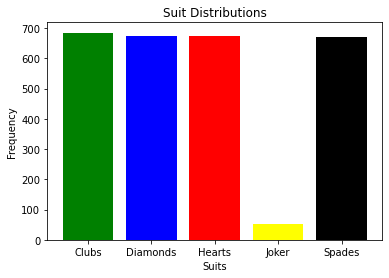

In [5]:
counts = df.groupby('suit').count().iloc[:,1]
plt.figure()
plt.title('Suit Distributions')
plt.xlabel('Suits')
plt.ylabel('Frequency')
plt.bar(counts.keys(),counts.values, color = ['green','blue','red','yellow','black'])
plt.show()

Our suit distributions are to be expected. Each suit other than clubs has $13*51\approx(663)$ images. Clubs has a few extra, due to the extra 4 of clubs images. Jokers simply has one rank so therefore only 51 or 52 images.

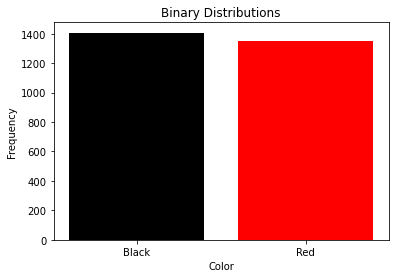

In [6]:
counts = df.groupby('is_red').count().iloc[:,1]
plt.figure()
plt.title('Binary Distributions')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(ticks = [0,1],labels = ['Black','Red'])
plt.bar(counts.keys(),counts.values,color = ['black','red'])
plt.show()

Finally, we see that this increase in the 4 of clubs effected the black/red distribution as well. Additionally, differences in 51 vs. 52 for more black cards could appreciate the difference shown above.

## Null Checks

In [7]:
df.isna().sum()

img_card_arr    0
card_class      0
pixel_0         0
pixel_1         0
pixel_2         0
               ..
pixel_186623    0
suit            0
is_red          0
suit_num        0
card_number     0
Length: 186630, dtype: int64

In [8]:
(df.isna().sum() == 0).all()

True

So our each of the entire (186631!) columns is full of zeroes. Therefore, there are no null values present in this dataset. This is a clear advantage of working with a 'toy' problem or image data in general. However, the difficulty comes from managing and manipulating such inconcievably large datasets.

With this in mind, the correlation coefficients of each feature can be obtained. Since 186 thousand features would be impossible to view, we will take a small slice of our data and view the correlations. The goal of this is to show potential multicolinearity that can cause issues when modelling. This occurs when features have relationships with other features as well as on the target. It is necessary to deal with these in some way before moving on. 

<AxesSubplot:>

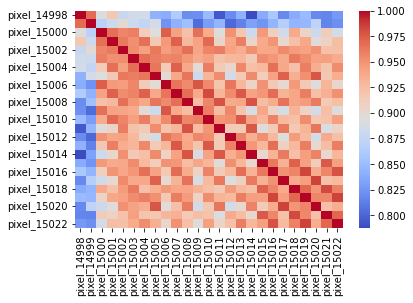

In [9]:
part_df = df.iloc[1:50,15000:15025]
sns.heatmap(part_df.corr(),cmap = 'coolwarm')

Despite some high correlation scores throughout the heatmap, there is no clear pattern of high or low between two pixels for *each* picture. One image might have a dark object featured, which would cause a high negative correlation to adjacent pixels for that image. 

With this in mind, we can move forward with modelling.